<a href="https://colab.research.google.com/github/ancestor9/MODELING-AND-SIMULATION/blob/main/Random_Walk_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 재현성을 위한 시드 설정 (선택 사항)
np.random.seed(42)

# 그래프 스타일 설정
plt.style.use('seaborn-v0_8-whitegrid')

## 1차원 단순 랜덤 워크 (1D Simple Random Walk)
- 동전 던지기처럼 앞(+1) 또는 뒤(-1)로만 움직이는 가장 기본적인 형태입니다.

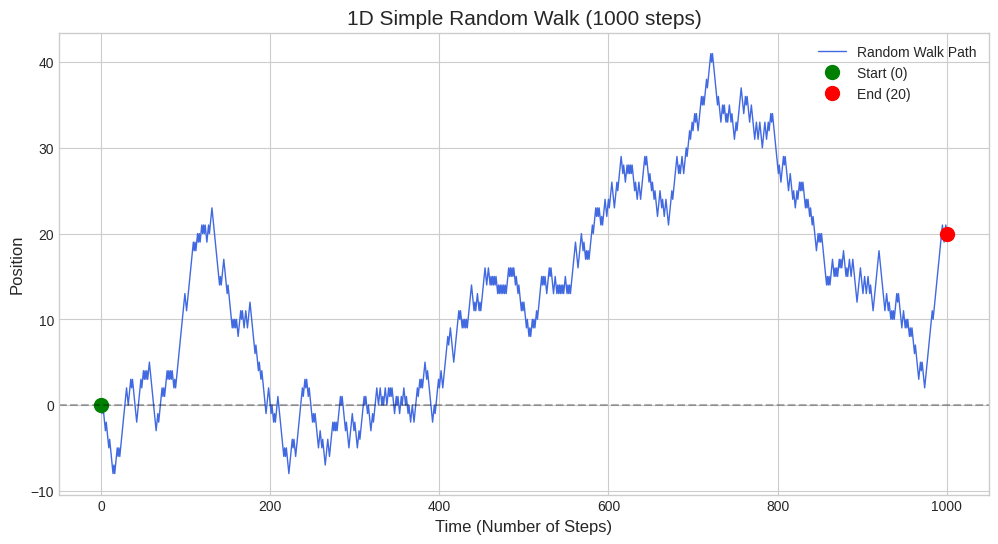

In [2]:
def plot_1d_random_walk(n_steps=1000):
    """
    1차원 랜덤 워크를 시뮬레이션하고 그립니다.
    :param n_steps: 총 걸음 수
    """
    # 1. 단계(Step) 생성: -1 또는 1 중에서 무작위 선택
    # size=n_steps 만큼의 난수 배열 생성
    steps = np.random.choice([-1, 1], size=n_steps)

    # 2. 위치(Position) 계산: 누적 합(Cumulative Sum) 계산
    # 시작점은 0으로 설정하기 위해 [0]을 앞에 붙임
    positions = np.concatenate([[0], steps.cumsum()])

    # 3. 시각화
    plt.figure(figsize=(12, 6))
    plt.plot(positions, label='Random Walk Path', color='royalblue', linewidth=1)

    # 시작점과 끝점 표시
    plt.plot(0, 0, 'go', markersize=10, label='Start (0)')
    plt.plot(n_steps, positions[-1], 'ro', markersize=10, label=f'End ({positions[-1]})')

    plt.title(f'1D Simple Random Walk ({n_steps} steps)', fontsize=15)
    plt.xlabel('Time (Number of Steps)', fontsize=12)
    plt.ylabel('Position', fontsize=12)
    plt.axhline(y=0, color='k', linestyle='--', alpha=0.3) # 0점 기준선
    plt.legend()
    plt.grid(True)
    plt.show()

# 실행 (걸음 수를 조절해보세요)
plot_1d_random_walk(n_steps=1000)

## 3. 여러 개의 1차원 랜덤 워크 동시 비교 (확산의 시각화)
- '확산' 개념을 보기 위해 여러 번 반복 실행해봅니다.

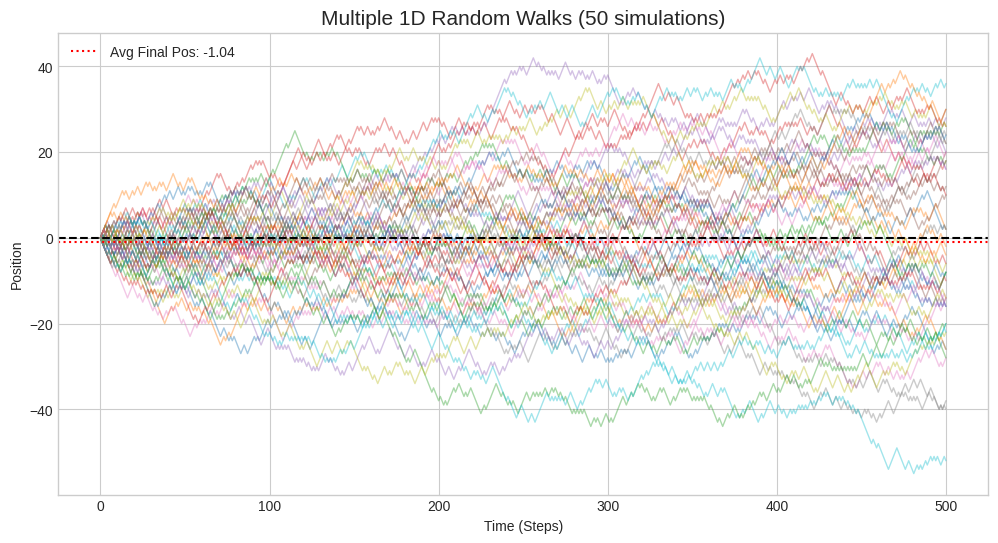

In [3]:
def plot_multiple_1d_walks(n_walks=10, n_steps=500):
    plt.figure(figsize=(12, 6))

    final_positions = []

    for i in range(n_walks):
        steps = np.random.choice([-1, 1], size=n_steps)
        positions = np.concatenate([[0], steps.cumsum()])
        # 각 경로를 옅은 색으로 그림
        plt.plot(positions, alpha=0.4, linewidth=1)
        final_positions.append(positions[-1])

    plt.title(f'Multiple 1D Random Walks ({n_walks} simulations)', fontsize=15)
    plt.xlabel('Time (Steps)')
    plt.ylabel('Position')
    plt.axhline(y=0, color='k', linestyle='--')

    # 평균 최종 위치 표시
    avg_final_pos = np.mean(final_positions)
    plt.axhline(y=avg_final_pos, color='r', linestyle=':', label=f'Avg Final Pos: {avg_final_pos:.2f}')
    plt.legend()
    plt.show()

# 실행
plot_multiple_1d_walks(n_walks=50, n_steps=500)

## 4. 2차원 랜덤 워크 (2D Random Walk)
- 평면 상에서 상하좌우로 움직이는 모습입니다. X축과 Y축 각각에 대해 독립적인 1차원 랜덤 워크를 수행하는 방식으로 구현할 수 있습니다.

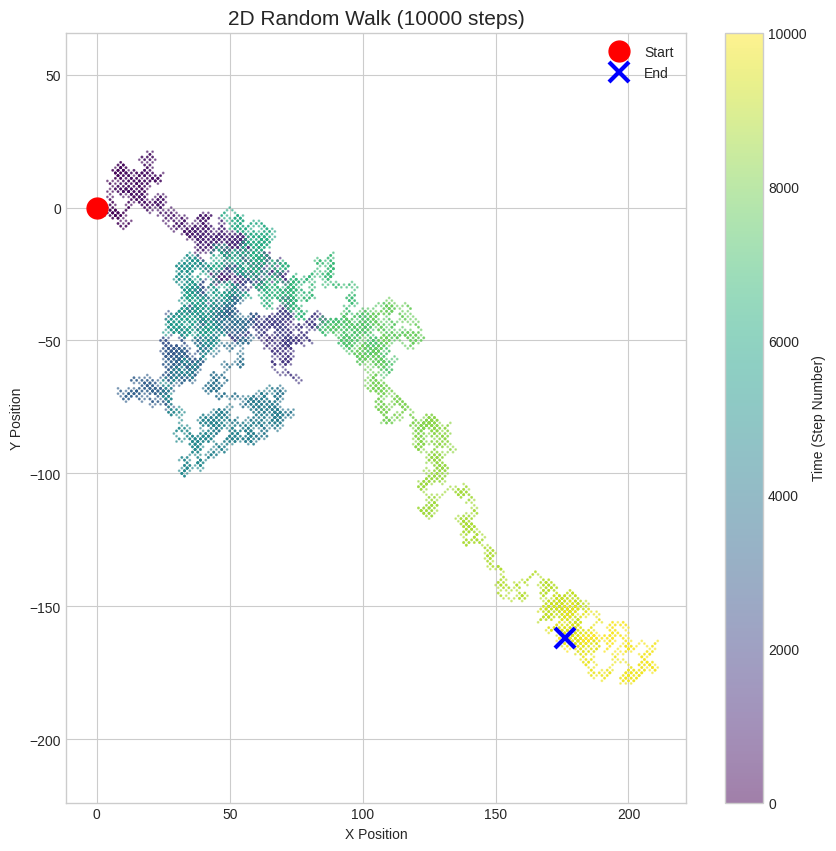

In [4]:
def plot_2d_random_walk(n_steps=5000):
    """
    2차원 평면에서의 랜덤 워크를 시뮬레이션합니다.
    """
    # X축 방향 움직임: -1 또는 1
    x_steps = np.random.choice([-1, 1], size=n_steps)
    # Y축 방향 움직임: -1 또는 1 (X와 독립적)
    y_steps = np.random.choice([-1, 1], size=n_steps)

    # 누적 합을 통해 위치 계산
    x_pos = np.concatenate([[0], x_steps.cumsum()])
    y_pos = np.concatenate([[0], y_steps.cumsum()])

    # 시각화
    plt.figure(figsize=(10, 10))

    # 경로 그리기 (시간의 흐름에 따라 색상이 변하게 설정)
    # 0부터 n_steps까지의 배열을 만들어 색상 맵(cmap)에 적용
    colors = range(n_steps + 1)
    plt.scatter(x_pos, y_pos, c=colors, cmap='viridis', s=1, alpha=0.5)
    # 경로를 선으로 연결하고 싶다면 아래 주석 해제 (조금 지저분해 보일 수 있음)
    # plt.plot(x_pos, y_pos, c='gray', alpha=0.2, linewidth=0.5)

    # 시작점과 끝점 강조
    plt.plot(0, 0, 'ro', markersize=15, label='Start')
    plt.plot(x_pos[-1], y_pos[-1], 'bx', markersize=15, markeredgewidth=3, label='End')

    plt.title(f'2D Random Walk ({n_steps} steps)', fontsize=15)
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.legend()
    plt.axis('equal') # X축과 Y축의 비율을 같게 설정
    plt.grid(True)
    plt.colorbar(label='Time (Step Number)') # 색상바 추가
    plt.show()

# 실행 (걸음 수를 늘리면 더 복잡한 패턴이 나옵니다)
plot_2d_random_walk(n_steps=10000)

2000개의 입자가 5000번 움직이는 중...


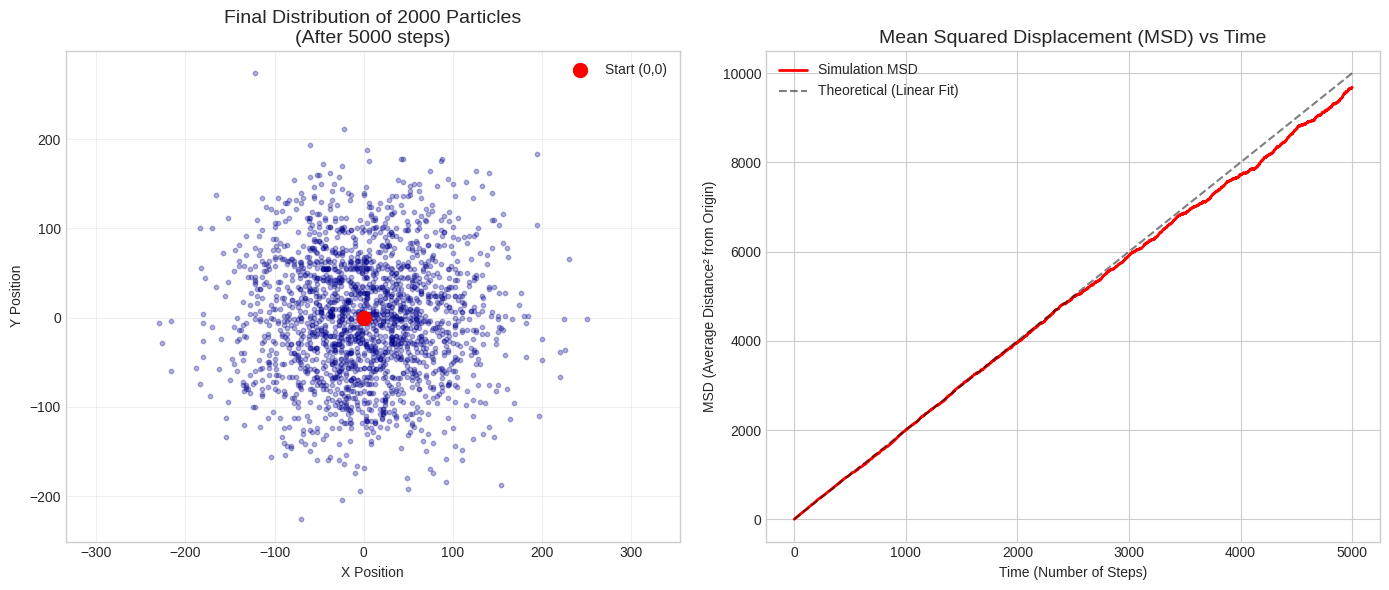

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_2d_diffusion(n_particles=1000, n_steps=1000):
    """
    여러 개의 입자를 동시에 시뮬레이션하여 확산 과정을 보여줍니다.
    """
    print(f"{n_particles}개의 입자가 {n_steps}번 움직이는 중...")

    # 1. 난수 생성 (모든 입자의 모든 스텝을 한 번에 생성 - 벡터화 연산)
    # shape: (n_particles, n_steps)
    x_steps = np.random.choice([-1, 1], size=(n_particles, n_steps))
    y_steps = np.random.choice([-1, 1], size=(n_particles, n_steps))

    # 2. 누적 합으로 위치 계산 (axis=1은 시간 축을 따라 누적)
    # 시작점(0)을 포함하기 위해 concatenate 사용
    x_pos = np.concatenate([np.zeros((n_particles, 1)), np.cumsum(x_steps, axis=1)], axis=1)
    y_pos = np.concatenate([np.zeros((n_particles, 1)), np.cumsum(y_steps, axis=1)], axis=1)

    # --- 시각화 1: 최종 위치 분포 (잉크가 퍼진 모습) ---
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    # 마지막 시점(n_steps)에서의 모든 입자 위치
    final_x = x_pos[:, -1]
    final_y = y_pos[:, -1]

    # 산점도 그리기
    plt.scatter(final_x, final_y, alpha=0.3, s=10, color='darkblue')
    plt.plot(0, 0, 'ro', markersize=10, label='Start (0,0)') # 시작점

    # 꾸미기
    plt.title(f'Final Distribution of {n_particles} Particles\n(After {n_steps} steps)', fontsize=14)
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.axis('equal') # 원형으로 퍼지는지 확인하기 위해 비율 고정
    plt.grid(True, alpha=0.3)
    plt.legend()

    # --- 시각화 2: 평균 제곱 변위 (MSD) 분석 ---
    # 확산 이론: <R^2> ~ t (시간에 비례하여 선형적으로 증가해야 함)

    plt.subplot(1, 2, 2)

    # 각 시간 단계(t)별로 원점으로부터의 거리 제곱 계산 (R^2 = x^2 + y^2)
    # axis=0은 모든 입자에 대한 평균
    squared_displacement = x_pos**2 + y_pos**2
    mean_squared_displacement = np.mean(squared_displacement, axis=0)

    time_steps = range(n_steps + 1)

    plt.plot(time_steps, mean_squared_displacement, 'r-', linewidth=2, label='Simulation MSD')

    # 이론적인 추세선 (기울기 2인 직선, 2D Random Walk 이론값: MSD = 2 * dim * D * t 인데 단순화하면 2t 근처)
    # 여기서는 단순 랜덤 워크(step size 1)이므로 MSD는 2*n_steps 가 됨 (X, Y 각각 분산 n)
    plt.plot(time_steps, [2 * t for t in time_steps], 'k--', alpha=0.5, label='Theoretical (Linear Fit)')

    plt.title('Mean Squared Displacement (MSD) vs Time', fontsize=14)
    plt.xlabel('Time (Number of Steps)')
    plt.ylabel('MSD (Average Distance² from Origin)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# 실행
simulate_2d_diffusion(n_particles=2000, n_steps=5000)

## 코드 실행 결과 해석

### 🔹 왼쪽 그래프: 산점도
- 입자들이 **(0,0)을 중심으로 둥글게 퍼진 형태**를 보인다.  
- 중심에 가까울수록 점이 빽빽하고, 바깥으로 갈수록 점이 적어지는 **정규분포(가우시안) 형태**가 나타난다.  
- 이는 **잉크 방울이 물에 퍼지는 모습과 동일한 패턴**이다.

---

### 🔹 오른쪽 그래프: MSD(Mean Squared Distance) 그래프
- **빨간색 실선(시뮬레이션 결과)**이  
  **검은색 점선(이론 예측)**을 거의 그대로 따라간다.
- 두 선 모두 **직선 형태로 우상향**하며 증가한다.
- 이는 다음 물리적 법칙을 증명한다:

> **시간이 2배 흐르면, 입자들이 퍼진 면적(거리의 제곱)도 2배 커진다.**

- 바로 이것이 **아인슈타인이 브라운 운동을 설명할 때 사용한 핵심 원리**이다.

---

### 📌 발표 활용 팁
- 단순한 **무작위 걷기(random walk)**가 실제 물리 세계의 **확산(diffusion)** 법칙과 어떻게 연결되는지 시각적으로 보여줄 수 있다.  
- “랜덤 움직임”이 “규칙 있는 물리 법칙”으로 귀결된다는 점을 강조하면 학생들의 이해가 빨라진다.

## **술 취한 사람을 찾으려면 ?**
- 어떤 parameter를 튜닝하면 되는가?

## **정규분포를 이용한 Random Walk Simulation**
- 위의 왼쪽 그림을 자세히 보고 분포를 맞추어 보아라 ?

정규분포(Normal Distribution)를 이용한 랜덤 워크는 **가우시안 랜덤 워크(Gaussian Random Walk)**라고 하며, 수학적으로는 **브라운 운동(Brownian Motion)**의 기초가 되는 모델입니다.

### 🔍 이전의 ±1 랜덤 워크와 비교

#### 1. 이전 모델: 이산적 이동
- 매 스텝마다 이동 거리가 **항상 ±1**  
- 움직임이 고정된 크기로 제한됨  
- 격자 위를 한 칸씩 움직이는 형태

#### 2. 이번 모델: 연속적 이동(정규분포 기반)
- 이동 거리가 **정규분포(종 모양)**를 따름  
- 대부분은 **작게 움직이고**, 가끔 **크게 이동**하는 경우도 발생  
- 실제 세계 물리현상과 유사

---

### 🌐 왜 중요한가?

이 모델은 다음과 같은 실제 현상을 설명하는 데 널리 사용됩니다.

- **미세 입자의 확산(브라운 운동)**
- **주식 가격 변동(Geometric Brownian Motion의 기반 모델)**
- **열 운동, 분자 운동의 시뮬레이션**

따라서 단순한 정규분포 기반 랜덤 이동은 자연 현상과 금융 모델링에서 모두 핵심적인 역할을 합니다.


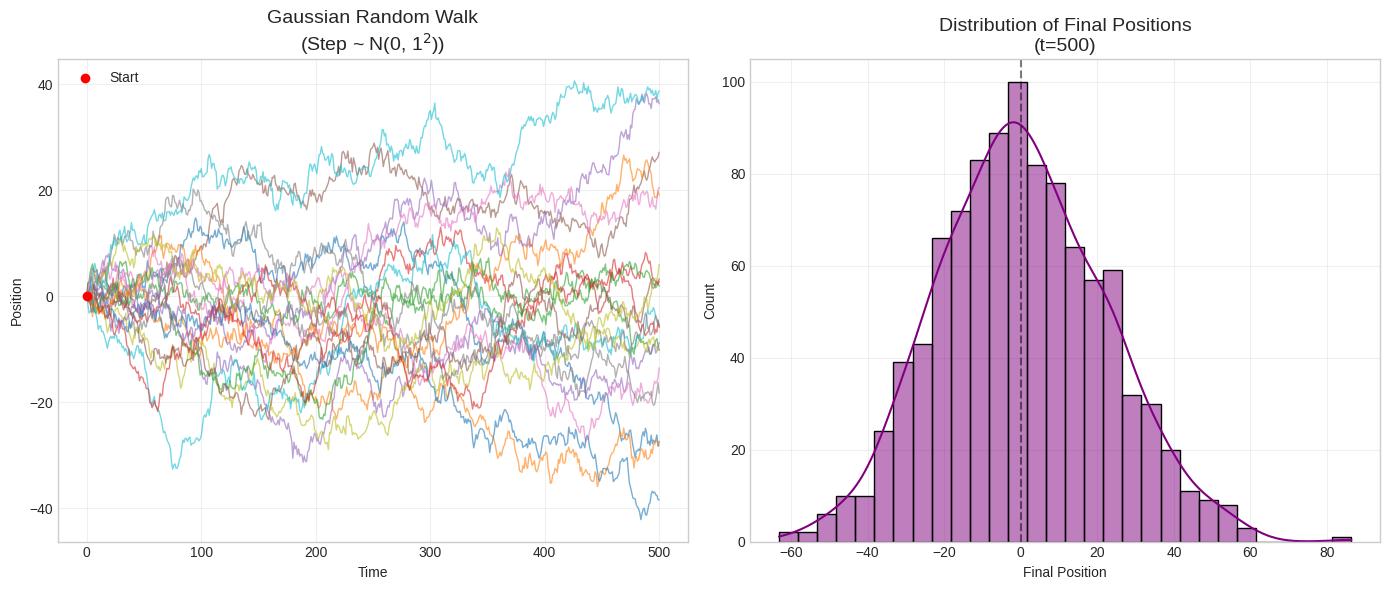

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def simulate_gaussian_random_walk(n_simulations=100, n_steps=1000, mu=0, sigma=1):
    """
    정규분포를 따르는 랜덤 워크를 시뮬레이션합니다.

    :param n_simulations: 시뮬레이션 할 경로(입자)의 개수
    :param n_steps: 시간 단계 (총 걸음 수)
    :param mu: 정규분포의 평균 (0이면 위아래 치우침 없음, 드리프트)
    :param sigma: 정규분포의 표준편차 (이동 폭의 크기, 변동성)
    """

    # 1. 정규분포에서 난수 생성 (이동 거리)
    # shape: (n_simulations, n_steps)
    # 평균(mu)과 표준편차(sigma)를 따르는 난수 생성
    steps = np.random.normal(loc=mu, scale=sigma, size=(n_simulations, n_steps))

    # 2. 누적 합을 통해 위치 계산 (경로 생성)
    # 초기 위치 0을 포함하기 위해 concatenate 사용
    initial_positions = np.zeros((n_simulations, 1))
    paths = np.concatenate([initial_positions, np.cumsum(steps, axis=1)], axis=1)

    # --- 시각화 ---
    plt.figure(figsize=(14, 6))

    # [왼쪽 그래프] 랜덤 워크 경로 (Time Series)
    plt.subplot(1, 2, 1)
    # 첫 20개의 경로만 그림 (너무 많으면 지저분하므로)
    for i in range(min(20, n_simulations)):
        plt.plot(paths[i], alpha=0.6, linewidth=1)

    plt.plot(0, 0, 'ro', label='Start') # 시작점 표시
    plt.title(f'Gaussian Random Walk\n(Step ~ N({mu}, {sigma}$^2$))', fontsize=14)
    plt.xlabel('Time')
    plt.ylabel('Position')
    plt.grid(True, alpha=0.3)
    plt.legend()

    # [오른쪽 그래프] 최종 위치의 분포 (Histogram)
    plt.subplot(1, 2, 2)
    final_positions = paths[:, -1]

    # 히스토그램과 커널 밀도 추정(KDE) 그리기
    sns.histplot(final_positions, kde=True, color='purple', bins=30)

    plt.title(f'Distribution of Final Positions\n(t={n_steps})', fontsize=14)
    plt.xlabel('Final Position')
    plt.ylabel('Count')
    plt.axvline(x=0, color='k', linestyle='--', alpha=0.5) # 중심선
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return paths

# 실행
# 평균(mu)=0, 표준편차(sigma)=1인 표준 정규분포 스텝
paths = simulate_gaussian_random_walk(n_simulations=1000, n_steps=500, mu=0, sigma=1)

### $\pm 1$ **랜덤 워크와 정규분포 랜덤 워크는 결국 같은 것인가?**

### 📌 np.random.normal(loc=mu, scale=sigma, ...)의 의미

이전 코드에서는 이동 값이 **-1 또는 +1**의 두 값만 나왔지만,  
정규분포를 사용하면 **0.1, -0.5, 2.3** 등 **연속적인 실수**가 생성됩니다.

- **mu = 0**  
  평균 이동값이 0이므로 장기적으로는 **제자리 근처를 맴도는 경향**이 있습니다.

- **sigma = 1**  
  한 걸음의 ** 변동성(보폭)**을 결정합니다.  
  값이 커질수록 그래프가 더 크게 출렁입니다.

---

### 🔹 왼쪽 그래프 (경로)

이전의 ±1 랜덤 워크보다 훨씬 **부드러운 곡선** 형태가 나타납니다. 이 모습이 **주식 차트와 비슷해 보이는 이유**입니다.

---

### 🔹 오른쪽 그래프 (최종 분포)

1,000번의 시뮬레이션 후 도착한 위치를 히스토그램으로 나타내면 **이상적인 종 모양(정규분포)**이 나타납니다.

📌 **중요한 수학적 성질**  
정규분포를 따르는 변수들의 합은 여전히 **정규분포**를 따릅니다.  
→ 랜덤 워크의 최종 위치가 정규분포가 되는 이유입니다.

---

### 💡 주식 가격 모델로 확장하려면?

현재 모델은 음수 가격이 가능하므로 실제 금융 모델과는 차이가 있습니다.  
이를 해결하기 위해 금융에서는 **기하 브라운 운동(GBM, Geometric Brownian Motion)**을 사용합니다.

#### 핵심 아이디어
- 덧셈 기반(random walk)이 아니라  
  **곱셈 기반(exp 누적)**으로 변환합니다.

#### 코드 예시

```python
price = initial_price * np.exp(np.cumsum(steps))


## 금융 공학이나 퀀트 투자에서 주가를 모델링
- 가장 기본이 되는 기하 브라운 운동(Geometric Brownian Motion, GBM) 모델로 발전시켜 보겠습니다.

- 이전 모델(단순 덧셈)과의 결정적인 차이는 **"복리(Compounding)"**입니다.

> - 이전: 100원에서 +10원, -10원 (가격이 음수가 될 수 있음 ❌)
> - GBM: 100원에서 +1%, -1% (가격은 항상 0보다 큼, 복리 효과 ⭕)

이 모델은 그 유명한 블랙-숄즈 옵션 가격 결정 모형의 기초가 됩니다.

<>:45: SyntaxWarning: invalid escape sequence '\m'
<>:45: SyntaxWarning: invalid escape sequence '\s'
<>:45: SyntaxWarning: invalid escape sequence '\m'
<>:45: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1244868799.py:45: SyntaxWarning: invalid escape sequence '\m'
  plt.title(f'Stock Price Simulation (GBM)\n$\mu$={mu*100}%, $\sigma$={sigma*100}%', fontsize=14)
/tmp/ipython-input-1244868799.py:45: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f'Stock Price Simulation (GBM)\n$\mu$={mu*100}%, $\sigma$={sigma*100}%', fontsize=14)


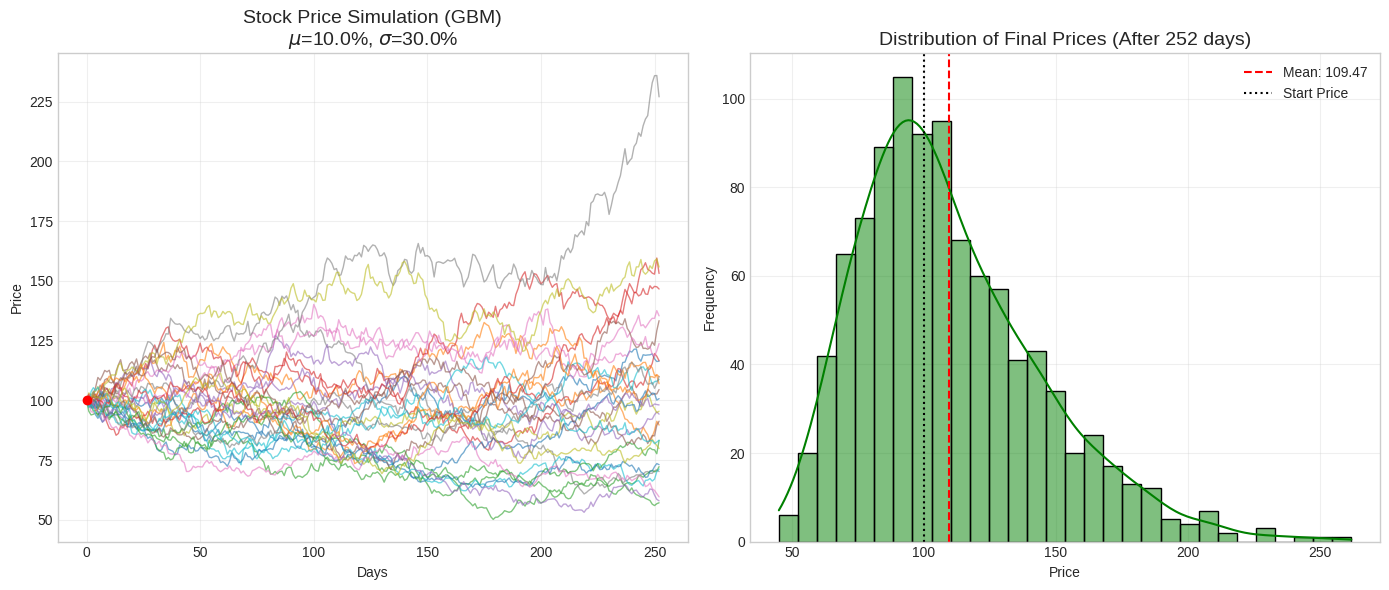

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def simulate_stock_price(S0=100, mu=0.1, sigma=0.3, T=1, dt=1/252, n_simulations=100):
    """
    기하 브라운 운동(GBM)을 이용한 주가 시뮬레이션

    :param S0: 초기 주가 (Start Price)
    :param mu: 연평균 기대 수익률 (Drift, 예: 0.1 = 10%)
    :param sigma: 연간 변동성 (Volatility, 예: 0.3 = 30%)
    :param T: 시뮬레이션 기간 (연 단위, 예: 1년)
    :param dt: 시간 간격 (1/252는 1거래일을 의미)
    :param n_simulations: 시뮬레이션 할 경로의 수
    """

    # 전체 스텝 수 계산 (예: 1년 * 252일 = 252 스텝)
    n_steps = int(T / dt)

    # 1. 브라운 운동의 난수 생성 (표준 정규분포)
    # shape: (n_steps, n_simulations) -> 시간 흐름이 행(row)
    Z = np.random.normal(0, 1, size=(n_steps, n_simulations))

    # 2. 기하 브라운 운동 공식 적용 (벡터화 연산)
    # 공식: S_t = S_{t-1} * exp( (mu - 0.5*sigma^2)*dt + sigma*sqrt(dt)*Z )
    # 로그 수익률(drift + diffusion) 계산
    drift = (mu - 0.5 * sigma**2) * dt
    diffusion = sigma * np.sqrt(dt) * Z

    daily_returns = np.exp(drift + diffusion)

    # 3. 누적 곱(cumprod)으로 주가 경로 생성
    # 초기 주가 S0를 맨 위에 쌓기 위해 vstack 사용
    price_paths = np.vstack([np.full(n_simulations, S0), daily_returns])
    price_paths = np.cumprod(price_paths, axis=0)

    # --- 시각화 ---
    plt.figure(figsize=(14, 6))

    # [왼쪽] 주가 이동 경로 (Monte Carlo Paths)
    plt.subplot(1, 2, 1)
    plt.plot(price_paths[:, :30], lw=1, alpha=0.6) # 30개만 그림
    plt.plot(0, S0, 'ro', label='Start Price')

    plt.title(f'Stock Price Simulation (GBM)\n$\mu$={mu*100}%, $\sigma$={sigma*100}%', fontsize=14)
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.grid(True, alpha=0.3)

    # [오른쪽] 만기 시점의 주가 분포 (Log-Normal Distribution)
    plt.subplot(1, 2, 2)
    final_prices = price_paths[-1]

    sns.histplot(final_prices, kde=True, color='green', bins=30)

    # 통계 표시
    mean_price = np.mean(final_prices)
    plt.axvline(mean_price, color='r', linestyle='--', label=f'Mean: {mean_price:.2f}')
    plt.axvline(S0, color='k', linestyle=':', label='Start Price')

    plt.title(f'Distribution of Final Prices (After {n_steps} days)', fontsize=14)
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return price_paths

# 실행: 현재가 100달러, 연 수익률 10%, 변동성 30%인 주식의 1년 뒤 시뮬레이션
paths = simulate_stock_price(S0=100, mu=0.10, sigma=0.30, T=1, n_simulations=1000)

## 코드 분석 및 금융적 의미

### 1. 공식의 변화: **덧셈 → 곱셈**
- 이전 랜덤 워크: `cumsum`(누적 합) → 위치가 +1, -1씩 더해지는 방식  
- 기하 브라운 운동(GBM): `cumprod`(누적 곱) → **수익률이 누적되는 방식**  
- 금융에서는 가격이 절대값이 아니라 **비율(%)** 로 움직이므로 곱셈 구조가 더 현실적입니다.

### 2. `np.exp(...)` 사용 이유
- 지수 함수는 복리 성장 효과를 반영합니다.
- 작은 변화가 여러 번 누적되면 곱셈 구조로 성장하는 것이 금융 자산의 특성과 일치합니다.

---

## 그래프 해석

### ● 왼쪽 그래프 — **주가 경로**
- 가격이 0보다 아래로 내려가질 않습니다.  
- 시간이 지날수록 변동 구간이 벌어지며 **나팔형 분산 구조**를 보입니다.  
- 실제 코스피·나스닥 등 주가 흐름과 매우 비슷한 결과가 나타납니다.

### ● 오른쪽 그래프 — **로그 정규분포(Log-Normal)**
- 이전의 정규분포(대칭)와 다르게 **오른쪽 꼬리가 긴 비대칭 분포**  
- 이유:
  - 가격은 0 아래로는 떨어질 수 없고(-100% 제한)
  - 위로는 제한 없이 상승 가능(+1000%도 가능)
- 금융 자산의 확률적 구조를 잘 설명하는 분포입니다.

---

## 추가 팁: 변동성(σ)의 영향

### σ를 조정하면 경로가 dramatically 변화합니다:

| σ 값 | 특성 |
|------|-------|
| **0.1** | 안정적인 자산처럼 변동폭이 좁게 모임 |
| **0.8** | 비트코인·고위험 자산처럼 경로가 크게 퍼지며 위험도 증가 |

- GBM 모델은 실제 금융권에서 **옵션 가격(Black–Scholes)**,  
  **위험 측정(VaR)**, **모의투자 시뮬레이션** 등에 직접 활용됩니다.

---

필요하시면  
- 포트폴리오 시뮬레이터  
- 옵션가격 계산 코딩  
- GBM 기반 주가 예측 프로젝트까지 확장도 만들어 드릴 수 있습니다.
